In [1]:
%pylab inline
import os, sys
sys.path.append("../")
import traml
import db
from scipy.optimize import minimize
import copy

Populating the interactive namespace from numpy and matplotlib


In [2]:
a = traml.Stack()
a.library.search('SiO2')
a.library.search('mgf2')

|     ID | SHELF   | BOOK         | PAGE            | DESCRIPTION                    |
|--------+---------+--------------+-----------------+--------------------------------|
| 111401 | main    | SiO2         | Malitson        | Malitson 1965: Fused silica; n |
| 111402 | main    | SiO2         | Ghosh-o         | Ghosh 1999: α-Quartz, n(o) 0.1 |
| 111403 | main    | SiO2         | Ghosh-e         | Ghosh 1999: α-Quartz, n(e) 0.1 |
| 111404 | main    | SiO2         | Radhakrishnan-o | Radhakrishnan 1951: α-Quartz;  |
| 111405 | main    | SiO2         | Radhakrishnan-e | Radhakrishnan 1951: α-Quartz;  |
| 111406 | main    | SiO2         | Kischkat        | Kischkat et al. 2012: Thin fil |
| 111407 | main    | SiO2         | Gao             | Gao et al. 2013: Thin film; n, |
| 111408 | main    | SiO2         | Lemarchand      | Lemarchand 2013: Thin film; n, |
| 116001 | main    | Bi12SiO20    | Gospodinov      | Gospodinov et al. 1988: n 0.48 |
| 300901 | glass   | fused_silica | Malitso

In [3]:
PAZO = 500603
PMMA = 500201
sio2 = 111401
mgf2 = 105404
a.library.page(sio2)

{'COMMENTS': 'Room temperature',
 'DATA': [{'coefficients': '0 0.6961663 0.0684043 0.4079426 0.1162414 0.8974794 9.896161',
   'range': '0.21 3.71',
   'type': 'formula 1'}],
 'REFERENCES': 'I. H. Malitson. Interspecimen Comparison of the Refractive Index of Fused Silica, <a href="http://dx.doi.org/10.1364/JOSA.55.001205"><i>J. Opt. Soc. Am.</i> <b>55</b>, 1205-1208 (1965)</a>'}

In [4]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
        stack.d(i, x[i-1])

    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    #min = 1-stack.average(TR, c, delta, o='a')
    min = stack.average(TR, c, delta)
   
    return min**10

In [5]:
def minTR(stack, film_range, c, delta, TR='T'):
    
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append(stack.config[i][3])
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    
    return result

In [6]:
c = traml.Stack()

peak = 0.65
delta = 0.01

stack_list = []


R=[]
n = [0]

N =5
for i in range(0, N):
    #if i % 2 == 0:
       # print 'even', i
        #c.add(PMMA,100, bnds=(50,250))
    # else:
        #c.add(PAZO,100, bnds=(50,250))
    
    c.add(mgf2, 100, bnds=(0,250))
    c.add(sio2, 100, bnds=(0,250))
    
    
    result = minTR(c, [1,len(c.config)-1], peak, delta, TR='T')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    
    stack_list.append(copy.deepcopy(c))
  
    print '============================================================================================'
   
    print i+1, ': ', 'R = ', c.average('R',peak,delta)
 
    

1 :  R =  0.0820558799705
2 :  R =  0.0902340593145
3 :  R =  0.110915928382
4 :  R =  0.134692789365
5 :  R =  0.146256761445


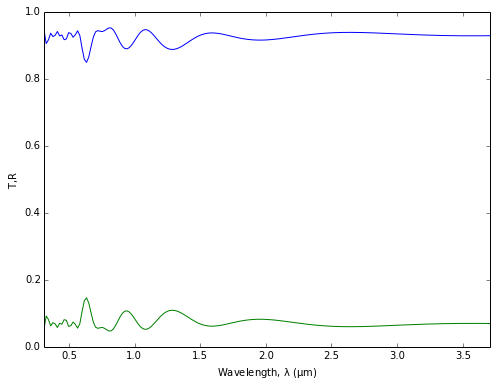

In [7]:
c.plot()

0.14625676144546285

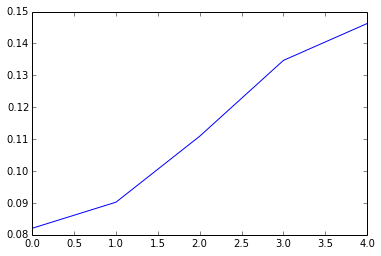

In [8]:
fig = figure()
ax = fig.add_subplot(111)
R = []

for stack in stack_list:
    R.append(stack.average('R',0.65,0.01))
    
ax.plot(R)
stack_list[-1].average('R', 0.65, 0.01)

(0.3, 0.9)

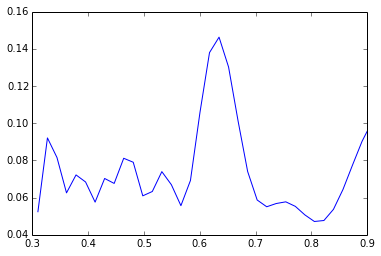

In [9]:
fig = figure()
ax = fig.add_subplot(111)
R = real(c.get_R())
x = c.x

ax.plot(x, R)
ax.set_xlim([0.3,0.9])
    